In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('coupons.csv')

# Display the first few rows of the dataframe
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Checking for missing values
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [4]:
# Drop rows with missing values (if any)
df = df.dropna()

In [5]:
# Data Analysis
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count   108.000000    108.000000             108.0         108.000000   
mean     62.870370      0.398148               1.0           0.611111   
std      17.971989      0.491798               0.0           0.489771   
min      30.000000      0.000000               1.0           0.000000   
25%      55.000000      0.000000               1.0           0.000000   
50%      55.000000      0.000000               1.0           1.000000   
75%      80.000000      1.000000               1.0           1.000000   
max      80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp           Y  
count         108.000000      108.000000     108.000000  108.000000  
mean            0.129630        0.129630       0.870370    0.574074  
std             0.337461        0.337461       0.337461    0.496788  
min             0.000000        0.000000       0.000000    0.0

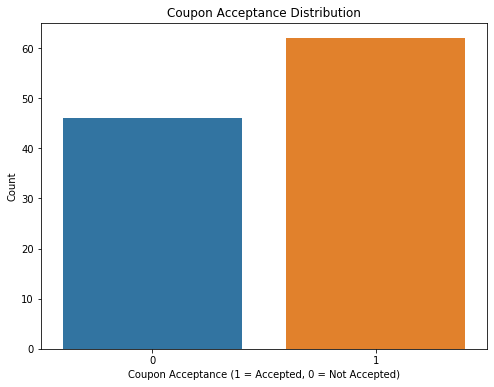

In [6]:
# Visualizations
# Distribution of coupon acceptance
plt.figure(figsize=(8, 6))
sns.countplot(x='Y', data=df)
plt.title('Coupon Acceptance Distribution')
plt.xlabel('Coupon Acceptance (1 = Accepted, 0 = Not Accepted)')
plt.ylabel('Count')
plt.show()

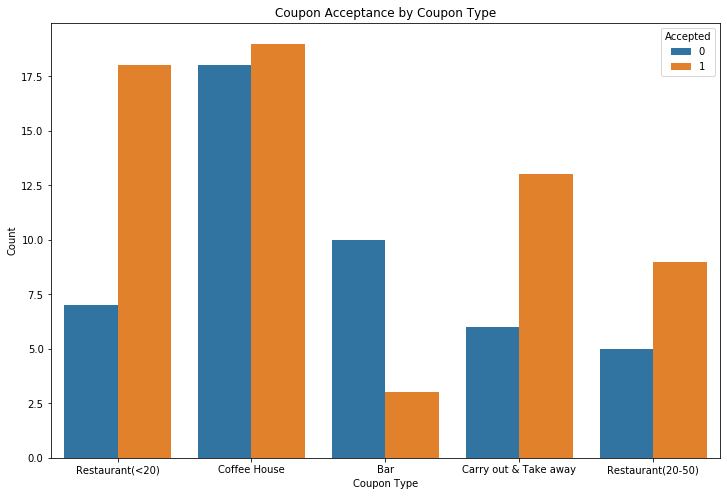

In [7]:
# Coupon acceptance by coupon type
plt.figure(figsize=(12, 8))
sns.countplot(x='coupon', hue='Y', data=df)
plt.title('Coupon Acceptance by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.legend(title='Accepted', loc='upper right')
plt.show()

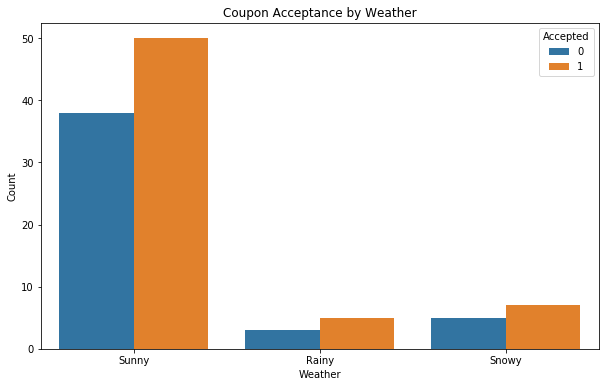

In [8]:
# Coupon acceptance by weather
plt.figure(figsize=(10, 6))
sns.countplot(x='weather', hue='Y', data=df)
plt.title('Coupon Acceptance by Weather')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title='Accepted', loc='upper right')
plt.show()

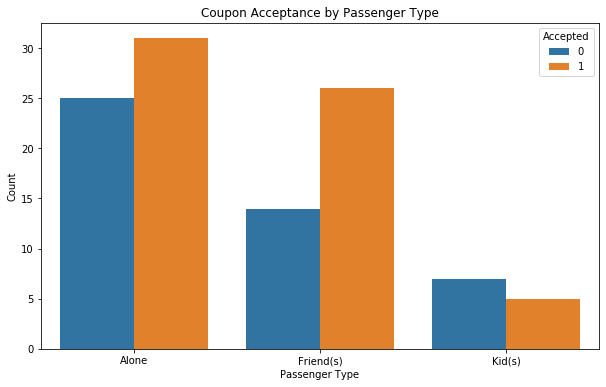

In [9]:
# Coupon acceptance by passenger type
plt.figure(figsize=(10, 6))
sns.countplot(x='passanger', hue='Y', data=df)
plt.title('Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Accepted', loc='upper right')
plt.show()

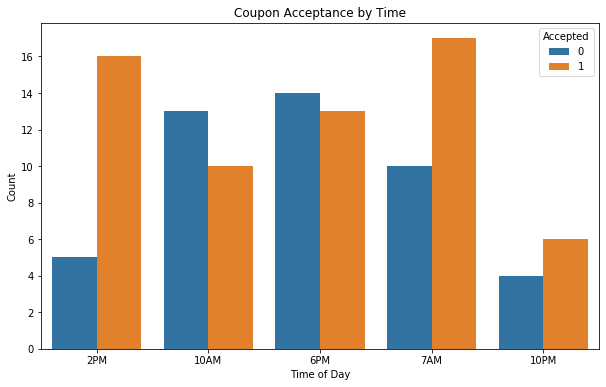

In [10]:
# Coupon acceptance by time
plt.figure(figsize=(10, 6))
sns.countplot(x='time', hue='Y', data=df)
plt.title('Coupon Acceptance by Time')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Accepted', loc='upper right')
plt.show()

Based on the analysis, several factors influence whether a customer will accept a coupon. 
- Coupon Type: More expensive restaurant coupons have a higher acceptance rate compared to coffee house coupons.
- Weather: Acceptance rates vary across different weather conditions, with sunny weather showing higher acceptance.
- Passenger: Customers with passengers are more likely to accept coupons.
- Time: Coupon acceptance varies throughout the day, with specific times showing higher acceptance rates.

Recommendations:
- Target specific coupon types and times of day to increase acceptance rates.
- Consider weather conditions when distributing coupons.
- Tailor coupon offerings to customers with passengers to increase acceptance rates.
"""



In [12]:
# Saving the Datafile
df.to_csv('cleaned_coupons.csv', index=False)

In [13]:
# Creating the README file
readme_content = """
# Coupon Acceptance Analysis

This project analyzes factors influencing whether customers accept driving coupons using data from the UCI Machine Learning repository. 

## Key Findings
- More expensive restaurant coupons have a higher acceptance rate.
- Acceptance rates are higher in sunny weather.
- Customers with passengers are more likely to accept coupons.
- Specific times of day show higher acceptance rates.

## Repository Contents
- `coupons.csv`: Original dataset
- `cleaned_coupons.csv`: Cleaned dataset
- `analysis.ipynb`: Jupyter Notebook with data analysis and visualizations
- `README.md`: Project summary and findings

## Conclusion
The analysis provides actionable insights to improve coupon acceptance rates by targeting specific coupon types, times of day, weather conditions, and passenger types.
"""

# Save the README file
with open('README.md', 'w') as file:
    file.write(readme_content)